0.PROJECT INTRO:

  According to the World Health Organization, breast cancer is the most common cancer among women worldwide, claiming the lives of hundreds of thousands of women each year and affecting countries at all levels of modernization (National Breast Cancer Foundation, Inc). Despite the existence of extensive evidence from controlled clinical trials and meta-analysis to support the use of systemic chemotherapy for high-risk breast cancer patients, no standard regimen exists (Gianni L., et al. 2001; Hortobagyi GN et al. 2001). In clinical practice, a breast cancer patient treated with adjuvant chemotherapy should balance the costs of treatment in the form of short-term or long-term side effects, and weigh these against the benefits of treatment in reducing her risk of suffering recurrence of her cancer or death. Consequently, the fine-tuning of adjuvant chemotherapy based on prognostic factors, co-morbid illness and patient preference have become an important issue.
However, number of axillary lymph node metastases is the best-established prognostic factor for localized breast cancers. This data here is running Exploratory Data Analysis to see if this data shows any association with the features available. 


1. DATA DESCRIPTION:
   This Breast Cancer survival data set contains the information about patients history and the survival after they underwent    chemotherapy followed by surgery.
   
   Attribute Information:
   1. Age of patient at time of operation (numerical).
   2. Number of positive auxillary nodes detected (numerical).
   3. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years
   
   Objective:
   The objective is to predict whether the patient will survive after 5 years or not based upon the patient’s age, year of        treatment and the number of positive lymph nodes.

2. Loading Data and Preparation: 

In [1]:
# importing the requyired packages and loading data set.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("EDA project.txt")

In [4]:
df.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.shape

(306, 4)

In [6]:
print(df.columns)

Index(['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status'], dtype='object')


3. Statistics:
    
    Performing statistics to understand data spread and centrality describes the essence of data features

In [7]:
df.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observations about the Cancer_Survival dataset:
1. Numbers of rows(training data) is: 306
2. Numbers of features(columns) is: 4
3. Year operation of patient show last 2 digits of years.
4. This dataset contain two class(it can be said binary classification):
5. Status 1 = the patient survived 5 years or longer
6. Status 2 = the patient died within 5 year
7. class 1's , 225 patient survived for 5 years or longer
8. class 2 's, 85 patient died within 5 years
9. It is Imbalance data set because class 1 has 225 data point and class 2 has 81 data point.

In [8]:
df['Status'].value_counts()*100/df.shape[0]

1    73.529412
2    26.470588
Name: Status, dtype: float64

 Observation:
 73% of class 1 pateints survived 5 years or more
 26% of class 2 patients dies within 5 years

In [9]:
survived = df.loc[df['Status']== 1]
not_survived = df.loc[df['Status'] == 2]

In [10]:
print("Patients survied 5 years or more")
survived.describe()

Patients survied 5 years or more


,Age,Years_of_operation,Pos_axillary_nodes,Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [11]:
print("Patients died within 5 years")
not_survived.describe()

Patients died within 5 years


,Age,Years_of_operation,Pos_axillary_nodes,Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


Observations:

Patients survived 5 years or more
   Mean = 2.791111
   75%(third quartile) = 3.00000
Patients died within 5 years
   Mean = 7.456790
   75%(thirs quartile) = 3.000000
Here increaase in standard deviation,so we can say that patients who had more positive-auxilarynodes
died early

In [12]:
survived_status = survived['Age'].describe()
not_survived_status =not_survived['Age'].describe()

df1_age = pd.DataFrame(data={'Survived':survived_status,'Died':not_survived_status})
df1_age

,Survived,Died
count,225.000000,81.000000
mean,52.017778,53.679012
std,11.012154,10.167137
min,30.000000,34.000000
25%,43.000000,46.000000
50%,52.000000,53.000000
75%,60.000000,61.000000
max,77.000000,83.000000


Observation:
    
 Mean of Died patients roughly equal Mean of Survived patients
 Std of Died patients roughly equal std of Survived patients
 It is not making so much clear. i.e age of patients does not effect on patient's status

4. Uni variate Analysis:
   
   To describe, summarize and find patterns in the single feature.

   plotting Graphs
   
   1. Age Feature

C:\Users\eekab\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\eekab\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


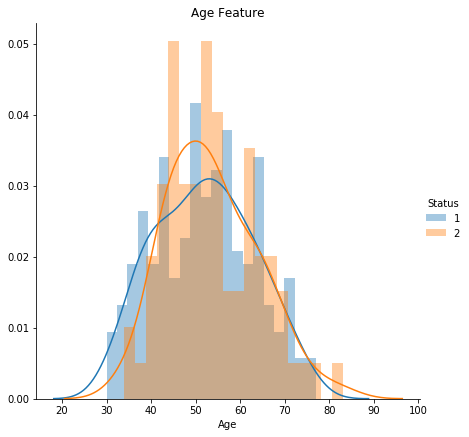

In [13]:
sns.FacetGrid(df,hue = 'Status',size =6).map(sns.distplot,'Age',bins = 20).add_legend()
plt.title("Age Feature")
plt.show()

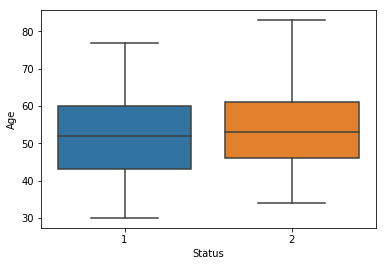

In [14]:
sns.boxplot(x = 'Status',y = 'Age',data = df)

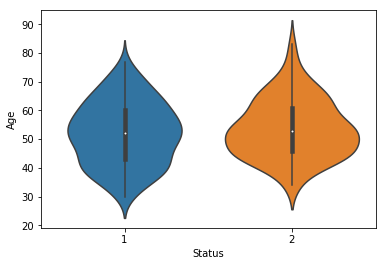

In [15]:
sns.violinplot(x = 'Status',y = 'Age',data = df,size = 6)

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]


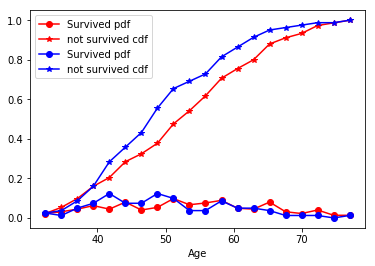

In [21]:
%matplotlib inline
# PDF & CDF
# compute pdf & cdf for survived
counts, bin_edges = np.histogram(survived['Age'],bins = 20,density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"ro-",label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,"r*-",label = "not survived cdf")
# compute pdf & cdf for not_survived
counts,bin_edgs = np.histogram(not_survived['Age'],bins= 20,density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'bo-',label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,'b*-',label = "not survived cdf")
plt.legend()
plt.xlabel("Age")
plt.show()

Observation:
survived and not survuved patients have similar pdf and cdf.ie huge overlap
Age feature is not relevent to determine status of patients.

2. Years_of_operation Feature:

In [22]:
survived_status = survived['Years_of_operation'].describe()
not_survived_status =not_survived['Years_of_operation'].describe()

# create dataframe to store the survived_status and not_survived_status statistics.
df1_year = pd.DataFrame(data={'Survived':survived_status,'Died':not_survived_status})
df1_year

,Survived,Died
count,225.000000,81.000000
mean,62.862222,62.827160
std,3.222915,3.342118
min,58.000000,58.000000
25%,60.000000,59.000000
50%,63.000000,63.000000
75%,66.000000,65.000000
max,69.000000,69.000000


Observation:
survived and not_survied patients have similar statistics
It does not make any sense.

C:\Users\eekab\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


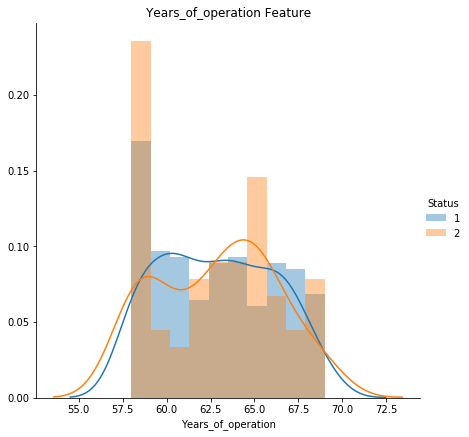

In [24]:
sns.FacetGrid(df,hue = 'Status',size =6).map(sns.distplot,'Years_of_operation',bins = 10
).add_legend()
plt.title("Years_of_operation Feature")
plt.show()

Observation:
Year of opeartion of patients does not classified .
It is not useful feature to determine status of patients.

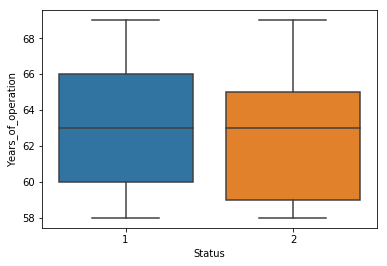

In [26]:
# draw the boxplot for year-of-operation feature:
sns.boxplot(x = 'Status',y = 'Years_of_operation',data = df)

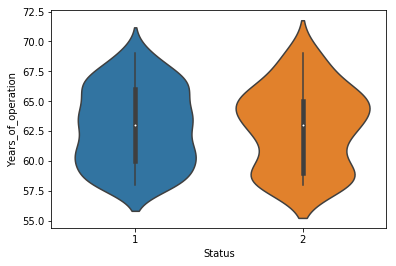

In [27]:
# draw th violinplot for year-of-operation feature:
sns.violinplot(x = 'Status',y = 'Years_of_operation',data = df)
plt.show()

[0.10666667 0.08       0.         0.10666667 0.         0.10222222
 0.         0.07111111 0.         0.09777778 0.10222222 0.
 0.06666667 0.         0.09777778 0.         0.09333333 0.
 0.04444444 0.03111111]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]
[0.14814815 0.11111111 0.         0.04938272 0.         0.03703704
 0.         0.08641975 0.         0.09876543 0.09876543 0.
 0.16049383 0.         0.07407407 0.         0.04938272 0.
 0.03703704 0.04938272]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


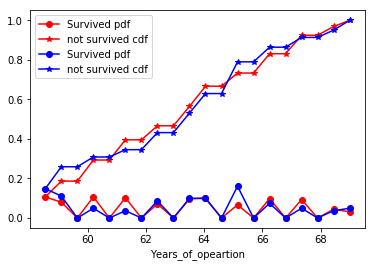

In [30]:
# now calculate pdf & cdf for year-of-operation

%matplotlib inline
# PDF & CDF
# compute pdf & cdf for survived
counts, bin_edges = np.histogram(survived['Years_of_operation'],bins = 20,density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"ro-",label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,"r*-",label = "not survived cdf")

# compute pdf & cdf for not_survived

counts,bin_edgs = np.histogram(not_survived['Years_of_operation'],bins= 20,density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'bo-',label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,'b*-',label = "not survived cdf")
plt.legend()
plt.xlabel("Years_of_opeartion")
plt.show()

Observation:
survived and not_survived patients have similar plots and vital overlap
It is not useful feature to determine status of patients

3. Positive-auxilary-nodes Feature:

In [34]:
survived_status = survived['Pos_axillary_nodes'].describe()
not_survived_status =not_survived['Pos_axillary_nodes'].describe()

# create dataframe to store the survived_status and not_survived_status statistics.
df1_nodes = pd.DataFrame(data={'Survived':survived_status,'Died':not_survived_status})
df1_nodes

,Survived,Died
count,225.000000,81.000000
mean,2.791111,7.456790
std,5.870318,9.185654
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,4.000000
75%,3.000000,11.000000
max,46.000000,52.000000


In [ ]:
sns.FacetGrid(df,hue = 'Status',height =7).map(sns.distplot,'Pos_axillary_nodes',bins = 10).add_legend()
plt.title("Pos_axillary_nodes")
plt.show()

Observation:
Most of patients have zero positive auxilary nodes
If positive nodes is higher then there is less chance for survival
If there is low or zero nodes then ,it is not surety that patients survived more yeras
Patients having zero nodes died early and patients having almost 1 survived more.
Higer positive -auxilary-nodes does not gives guarantee for more survival

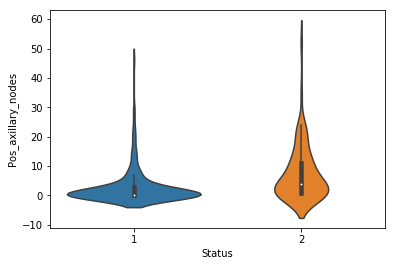

In [40]:
# draw the violinplot for Positive-auxilary-nodes

sns.violinplot(x= 'Status',y = 'Pos_axillary_nodes',data = df)
plt.show()

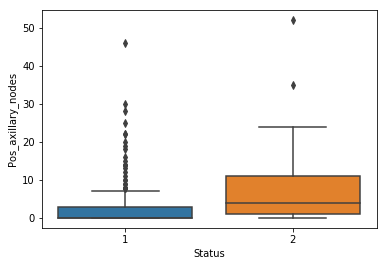

In [41]:
# draw the boxplot for Positive-auxilary-nodes

sns.boxplot(x= 'Status',y = 'Pos_axillary_nodes',data = df)
plt.show()

Observation:
75% of survived patients and 50% of not_survives patients have positive-auxilary-nodes < 4

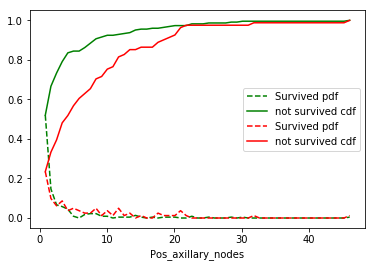

In [42]:
%matplotlib inline
# PDF & CDF
# compute pdf & cdf for survived
counts, bin_edges = np.histogram(survived['Pos_axillary_nodes'],bins = 55,density
= True)
pdf = counts/sum(counts)
# print(pdf)
# print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"--g",label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,"g",label = "not survived cdf")
# compute pdf & cdf for not_survived
counts,bin_edgs = np.histogram(not_survived['Pos_axillary_nodes'],bins= 55,density
= True)
pdf = counts/sum(counts)
#print(pdf)
# print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'--r',label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,'r',label = "not survived cdf")
plt.legend()
plt.xlabel("Pos_axillary_nodes")
plt.show()

Obervation:

1. if postive-auxilary nodes is 1 then, then we will misclassify the data roughly 50% of survived and
   20% of not_survived
2. if positive-auxilary node is 4 the, we will misclassify the data roughly 15% of survived and roughly
   50% of not_survived
3. if positive-auxilary node is 10 the, we will misclassify the data roughly 10% of survived and roughly
   70% of not_survived

Bivariate Analysis:

C:\Users\eekab\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


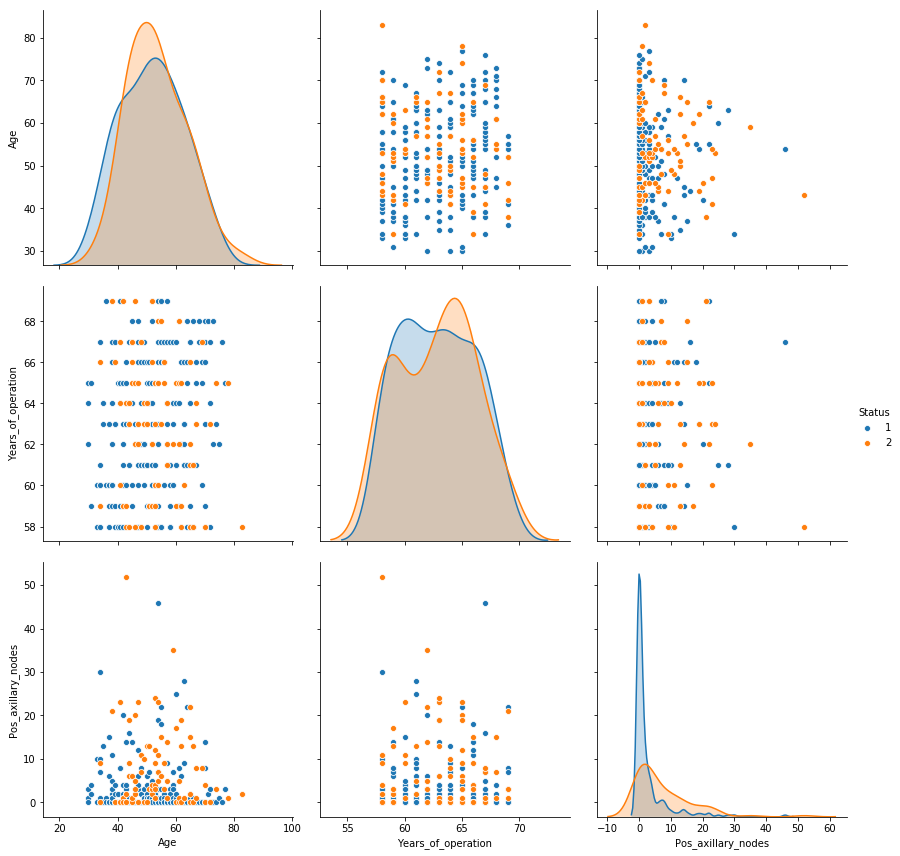

In [45]:
# plot the 3*3 grid for cancer_survival dataset

# sns.set_style("whitegrid")

sns.pairplot(df,hue = 'Status',vars = ['Age','Years_of_operation','Pos_axillary_nodes'],diag_kind = 'kde',size =4);
plt.show()

Observation:
Year-of-operation does not play any role with with others features.

Summary:

1. Age does not effect on survival status.
2. Year-of -opeartion does not effect on survival status
3. Positve -auxilary-nodes afffect on survival status
   i)  if more numbers of Positve -auxilary-nodes deetcted then patients died within 5 years
   ii) if less numbers of Positve -auxilary-nodes detected then patients survived for 5 years or more